In [1]:



import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [2]:
app_packages = [
  
  'com.dimts.best.bestapplication'
]


result, continuation_token = reviews(
    'com.dimts.best.bestapplication',
    lang='en_IN', # defaults to 'en'
    country='IN', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=15000, # defaults to 100
    #filter_score_with=5 # defaults to None(means all score)
)
print((result))
#print(result[0]["content"])
dic ={'score':[],'content':[],'userName':[] }
for i in range(1,len(result)):
    dic['score'].append(result[i]["score"])
    dic['content'].append(result[i]["content"])
    dic['userName'].append(result[i]["userName"])

df=pd.DataFrame(dic) 
print(df)
#df.to_csv('apps_reviews.csv', index=None, header=True)    

[{'reviewId': 'gp:AOqpTOGKQVMsNDA-cqwM7FL_YHPWVNaeVfXIWJ3Sd2Xsrcvs61BrT2bd7rJptUgK3PULz9NCagUouRXEtTRtwmM', 'userName': 'Shayna Shaikh', 'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJwodUNr0CkWO0KHL0T40OpNWG3g2lgcEJ080EMX=mo', 'content': 'It is truly an amazing app and pretty accurate. Very easy to use and really makes your journey easy too. However, currently I am facing issue that it is not working at all but this is the first time its happening otherwise its fine. Please solve this ASAP cause I love and trust this app. I wanted to give 5 star but it stopped working so sorry...', 'score': 4, 'thumbsUpCount': 13, 'reviewCreatedVersion': '1.0.4', 'at': datetime.datetime(2021, 8, 4, 10, 47, 15), 'replyContent': None, 'repliedAt': None}, {'reviewId': 'gp:AOqpTOE1MtLMjjHUq0YyhbILKghgMiFA93hiDyZ7OPotFjGpgLgdr7xq7JU675Wf9Vm0pHPlZsXsh_CBGh7xprg', 'userName': 'PRAVIN GIRAP', 'userImage': 'https://play-lh.googleusercontent.com/a/AATXAJyv0SnwwDFOnKOrYbTDOesuh2qggnVmxo25Iph-=mo', '

In [3]:
# Load the required libraries for cleaning
import string,re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [4]:
# Create a function to generate cleaned data from raw text
def clean_text(tweets):
    tweets = word_tokenize(tweets) # Create tokens
    tweets = tweets[4:] # Remove RT@
    tweets= " ".join(tweets) # Join tokens
    tweets= re.sub('https','',tweets) # Remove 'https' text with blank
    tweets = [char for char in tweets if char not in string.punctuation] # Remove punctuations
    tweets = ''.join(tweets) # Join the leters
    tweets = [word for word in tweets.split() if word.lower() not in stopwords.words('english')] # Remove common english words (I, you, we,...)
    return " ".join(tweets)

In [5]:
df['content']=df['content'].apply(clean_text)
print(df.head())

   score                                            content        userName
0      5  showing Dept TIME ALSO show destination ARRIVA...    PRAVIN GIRAP
1      5  use Makes planning spotting independently easi...   James Kakolil
2      3  AC buses considered app shows normal buses tim...      Pranay Lad
3      3  give 5 stars nowadays showing exact timings bu...  Akshat Varaiya
4      2  5 star installing application days know cons s...    Ritik Kantak


In [6]:
features = df['content']
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    
    # Remove single characters appearing in the text except the start
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    # Remove single characters appearing at the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    
    # Substitute multiple spaces with a single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    
    # Remove prefix 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Convert to lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [7]:
processed_features[0:3]


['showing dept time also show destination arrival time possible show estimated running time mark workman buses reached busstop 432 hrs bus arrived dot time staff could board mail express guard reach cst 450 hrs 01151 train dept 510 hrs',
 'use makes planning spotting independently easier forensic details highly recommended fare citing would appreciated incorporated earliest',
 'ac buses considered app shows normal buses time sometimes incorrect']

In [8]:
df['content'] = processed_features
print(df['content'])

0       showing dept time also show destination arriva...
1       use makes planning spotting independently easi...
2       ac buses considered app shows normal buses tim...
3       give 5 stars nowadays showing exact timings bu...
4       5 star installing application days know cons s...
                              ...                        
1125                                                     
1126                                                     
1127                                                     
1128                                                     
1129                                                     
Name: content, Length: 1130, dtype: object


In [9]:
from textblob import TextBlob  ### Python library to create sentiment analysis

In [10]:
# Create a function to calculate Sentiment scores for each text
def generate_polarity(text):
    sentiment = TextBlob(text).sentiment
    return sentiment

In [11]:
# Apply the function to processed data
sentiment = df['content'].apply(generate_polarity)
sentiment = sentiment.to_frame()
sentiment.head()

,content
0,"(0.0, 1.0)"
1,"(0.12, 0.25499999999999995)"
2,"(0.15, 0.6499999999999999)"
3,"(0.20833333333333334, 0.375)"
4,"(0.4, 0.25)"


In [12]:
# Use the first element as Polarity
sentiment['polarity'] = sentiment['content'].apply(lambda x:x[0])

# Use the second element as Subjectivity
sentiment ['subjectivity'] = sentiment['content'].apply(lambda x:x[1])

In [13]:
# Add two columns to DataFrame for Polarity and Subjectivity score respectively

df['polarity'] = sentiment['polarity']
df['subjectivity'] = sentiment['subjectivity']

In [14]:
df['polarity_encoded'] = ['positive' if x > 0 else 'negative' if x < 0 else 'neutral' for x in df['polarity']]

In [15]:
# Print the number of review of each category of polarity
df['polarity_encoded'].value_counts()

neutral     647
positive    377
negative    106
Name: polarity_encoded, dtype: int64

In [16]:
# Print the most positive and most negative tweet

print("The most positive review:",df.iloc[df['polarity'].idxmax()]['content'])
print("The most negative review:",df.iloc[df['polarity'].idxmin()]['content']) 

The most positive review: track shows almost perfect position bus proximity 23 mins
The most negative review: worst app ever used1hour wating breachcandy hospital stop fcor 104 135 bus app shownig cane 2minuts bus driver change route bus disappeared


In [17]:
# Print the most subjective and most objective tweet

print("The most subjective review:",df.iloc[df['subjectivity'].idxmax()]['content'])
print("The most objective review:",df.iloc[df['subjectivity'].idxmin()]['content']) 

The most subjective review: showing dept time also show destination arrival time possible show estimated running time mark workman buses reached busstop 432 hrs bus arrived dot time staff could board mail express guard reach cst 450 hrs 01151 train dept 510 hrs
The most objective review: location app multiple options number


In [18]:
df.columns
df.to_csv('BEST_Review_Pol')

In [19]:
dfv= df[['content', 'polarity_encoded']]


In [20]:
print(dfv)

                                                content polarity_encoded
0     showing dept time also show destination arriva...          neutral
1     use makes planning spotting independently easi...         positive
2     ac buses considered app shows normal buses tim...         positive
3     give 5 stars nowadays showing exact timings bu...         positive
4     5 star installing application days know cons s...         positive
...                                                 ...              ...
1125                                                             neutral
1126                                                             neutral
1127                                                             neutral
1128                                                             neutral
1129                                                             neutral

[1130 rows x 2 columns]


In [21]:
# Tokenize the text using TweetTokenizer from NLTK

from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [22]:
# Function to generate tokens using TweetTokenizer
def tokenize(text): 
    tk = TweetTokenizer()
    return tk.tokenize(text)

vectorizer = CountVectorizer(analyzer = 'word',tokenizer = tokenize,lowercase = True,ngram_range=(1, 1))

In [23]:
# Generate unique words from the processed data by applying Count Vectorizer along with TweetTokenizer

count= vectorizer.fit_transform(dfv['content'])

In [24]:
# What is the shape of the data- Count vectorizer provides information about unique words present in data
count.shape
# This returns the shape of the term-document matrix geerated by application of Count Vectorizer
# The matrix contains same number of rows as in the input DataFrame and number of columns represent the number of unique ngrams (here unigrams) created by vectorizer

(1130, 2130)

In [25]:
# Load the libraries required for performing classification

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [26]:
# Split the data into training and testing data sets
# Use processed data as independent variable and polarity as dependent variable

X = dfv['content'].values
y = dfv['polarity_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, test_size=0.3)

In [27]:
# Extract features using TFIDF Vectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_train_idf = vectorizer.fit_transform(X_train)
X_test_idf = vectorizer.transform(X_test)

In [28]:
# Print idf values
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
# Sort ascending
df_idf.sort_values(by=['idf_weights'],ascending = False).head()

,idf_weights
हण,6.981414
proceed,6.981414
projects,6.981414
promised,6.981414
promoted,6.981414


In [29]:
# Perform Multinomial Naive Bayes Classification
# Apply MultinomialNB on training data
mnb = MultinomialNB()
mnb.fit(X_train_idf, y_train)

MultinomialNB()

In [30]:
# Predict polarity by fitting the model to testing data
pred_mnb = mnb.predict(X_test_idf)

# Calculate accuracy of predicted values
acc = accuracy_score(y_test, pred_mnb)


results = pd.DataFrame([['Multinomial Naive Bayes', acc]],
               columns = ['Model', 'Accuracy'])

print(results)

                     Model  Accuracy
0  Multinomial Naive Bayes  0.766962


In [31]:
# Perform Random Forest classification on the processed data and compare the accuracy score of both these models

# Random Forest Classifier with 'gini'

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_idf, y_train)

# Predict using testing data
y_pred_rf = clf_rf.predict(X_test_idf)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Gini)', acc]],
               columns = ['Model', 'Accuracy'])

results = results.append(model_results, ignore_index = True)
print(results)

                     Model  Accuracy
0  Multinomial Naive Bayes  0.766962
1      Random Forest(Gini)  0.823009


In [32]:
# Random Forest Classifier with 'entropy'

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion='entropy')
clf_rf.fit(X_train_idf, y_train)

# Predict using testing data
y_pred_rf = clf_rf.predict(X_test_idf)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Entropy)', acc]],
               columns = ['Model', 'Accuracy'])

results = results.append(model_results, ignore_index = True)
print(results)

                     Model  Accuracy
0  Multinomial Naive Bayes  0.766962
1      Random Forest(Gini)  0.823009
2   Random Forest(Entropy)  0.825959


In [33]:
# Display confusion matrix for Random Forest
#print(y_test,y_pred_rf)
print(confusion_matrix(y_test,y_pred_rf, labels=['positive','neutral' ,'negative' ])) ### Confusion matrix for Random Forest
print ( 'Recall:', recall_score(y_test, y_pred_rf,pos_label='positive'
                                           ,average=None))
print ('Precision:', precision_score(y_test, y_pred_rf,pos_label='positive' , average=None))
print ('Precision:', precision_score(y_test, y_pred_rf,pos_label='positive' , average='micro'))

[[ 89  28   0]
 [  9 179   1]
 [ 14   7  12]]
Recall: [0.36363636 0.94708995 0.76068376]
Precision: [0.92307692 0.8364486  0.79464286]
Precision: 0.8259587020648967


C:\Users\gopal.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\gopal.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\gopal.yadav\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


Text(28.109375, 0.5, 'Actual')

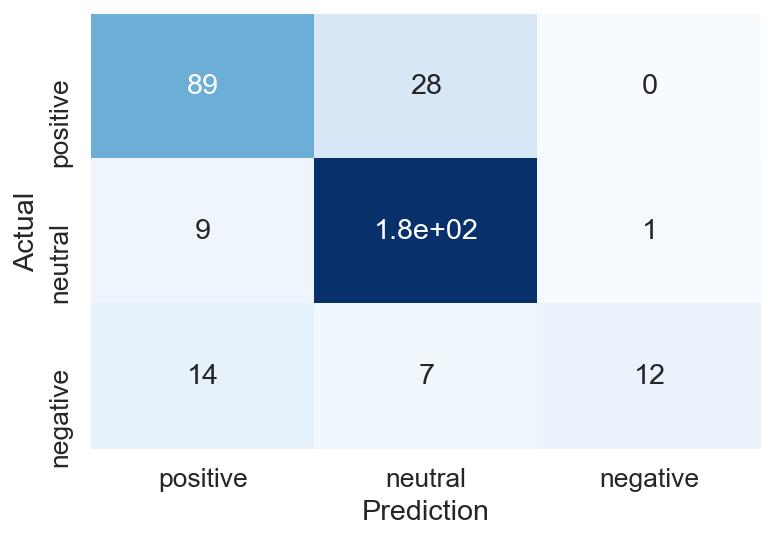

In [34]:
import seaborn as sns
cf_matrix=confusion_matrix(y_test,y_pred_rf ,labels=['positive','neutral' ,'negative' ])
dfm= pd.DataFrame(data=cf_matrix, index=['positive','neutral' ,'negative'], columns=['positive','neutral' ,'negative'])
#dfm1=dfm.pivot('Actual','Prediction')

fig, ax = plt.subplots(1)
sns.heatmap(dfm,annot=True, cbar=False, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Actual')
#ax.set_ylim((0,15))
#plt.text(5,12.3, "Heat Map", fontsize = 20, color='Black', fontstyle='italic')

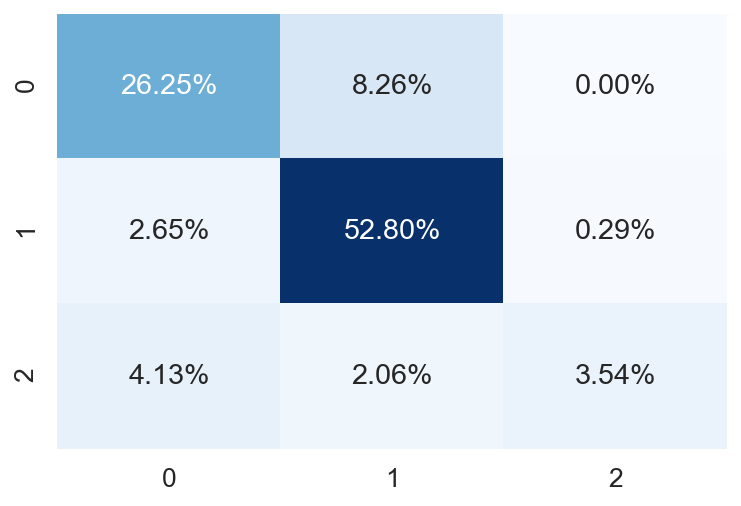

In [35]:
import numpy as np

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)

plt.show()

In [36]:
# adopted from sent_tran_eval.py
def build_model(nb_words, rnn_model="SimpleRNN", embedding_matrix=None):
    '''
    build_model function:
    inputs: 
        rnn_model - which type of RNN layer to use, choose in (SimpleRNN, LSTM, GRU)
        embedding_matrix - whether to use pretrained embeddings or not
    '''
    model = Sequential()
    # add an embedding layer
    if embedding_matrix is not None:
        model.add(Embedding(nb_words, 
                        200, 
                        weights=[embedding_matrix], 
                        input_length= max_len,
                        trainable = False))
    else:
        model.add(Embedding(nb_words, 
                        200, 
                        input_length= max_len,
                        trainable = False))
        
    # add an RNN layer according to rnn_model
    if rnn_model == "SimpleRNN":
        model.add(SimpleRNN(200))
    elif rnn_model == "LSTM":
        model.add(LSTM(200))
    else:
        model.add(GRU(200))
    # model.add(Dense(500,activation='relu'))
    # model.add(Dense(500, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [37]:
model_rnn = build_model(nb_words, "SimpleRNN", embedding_matrix)
model_rnn.fit(train_X, train_y, epochs=20, batch_size=120,
          validation_data=(valid_X, valid_y), callbacks=EarlyStopping(monitor='val_accuracy', mode='max',patience=3))
predictions = model_rnn.predict(valid_X)
predictions = predictions.argmax(axis=1)
print(classification_report(valid_y.argmax(axis=1), predictions))

NameError: name 'nb_words' is not defined